In [65]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu, linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)


tf.keras.backend.set_floatx('float64')

tf.autograph.set_verbosity(0)

In [57]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Train images and labels
print(train_images.shape)  # (60000, 28, 28)
print(train_labels.shape)  # (60000,)

# Test images and labels
print(test_images.shape)  # (10000, 28, 28)
print(test_labels.shape)  # (10000,)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [58]:
# Preprocess the data
train_images = train_images / 255.0
test_images = test_images / 255.0


In [59]:

train_images = tf.reshape(train_images, (-1, 784))
test_images = tf.reshape(test_images, (-1, 784))


In [60]:
# GRADED CELL: model
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

tf.random.set_seed(1234)
model = Sequential(
    [
        ### START CODE HERE ###
        tf.keras.Input(shape=(784,)),
        Dense(units=25, activation='relu'),
        Dense(units=15, activation='relu'),
        Dense(units=10, activation='linear')
        ### END CODE HERE ### 

    ], name="Complex"
)
model.compile(
    ### START CODE HERE ### 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
    ### END CODE HERE ### 
)

In [61]:
model.summary()

Model: "Complex"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ dense_24 (Dense)              │ (None, 25)            │       19,625 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_25 (Dense)              │ (None, 15)            │          390 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_26 (Dense)              │ (None, 10)            │          160 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 20,175 (78.81 KB)

 Trainable params: 20,175 (78.81 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
history = model.fit(
    train_images,train_labels,
    epochs=40
)

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 842us/step - accuracy: 0.8614 - loss: 0.4497
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 850us/step - accuracy: 0.9372 - loss: 0.2143
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 805us/step - accuracy: 0.9455 - loss: 0.1894
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 825us/step - accuracy: 0.9516 - loss: 0.1706
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 803us/step - accuracy: 0.9533 - loss: 0.1605
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 821us/step - accuracy: 0.9571 - loss: 0.1542
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 807us/step - accuracy: 0.9595 - loss: 0.1462
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9602 - loss: 0.1404
Epoch 9/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9620 - loss: 0.1360
Epoch 10/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 960us/step - accuracy: 0.9633 - loss: 0.1323
Epoch 11/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 939us/step - accuracy: 0.9656 - loss: 0.1225
Epoch 12/40


In [63]:
# Evaluate the model
evaluation_result = model.evaluate(test_images, test_labels)
print(f"Evaluation result: {evaluation_result}")

# Handle different evaluation result formats
if isinstance(evaluation_result, (list, tuple)):
    test_loss, test_accuracy = evaluation_result
    print(f"Test loss: {test_loss}")
    print(f"Test accuracy: {test_accuracy}")
else:
    test_loss = evaluation_result
    print(f"Test loss: {test_loss}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.9482 - loss: 0.3328
Evaluation result: [0.29401889669191295, 0.9546]
Test loss: 0.29401889669191295
Test accuracy: 0.9546


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


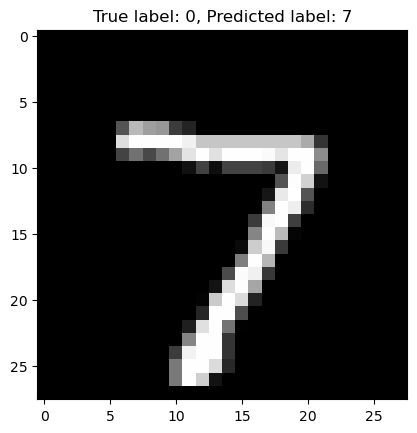

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


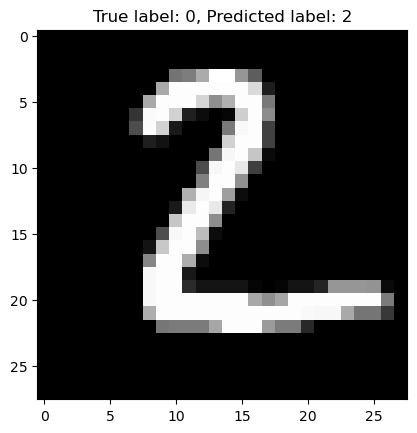

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


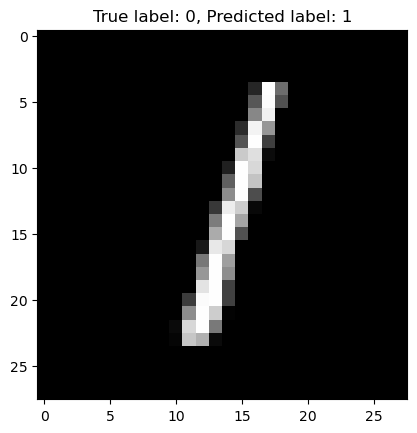

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


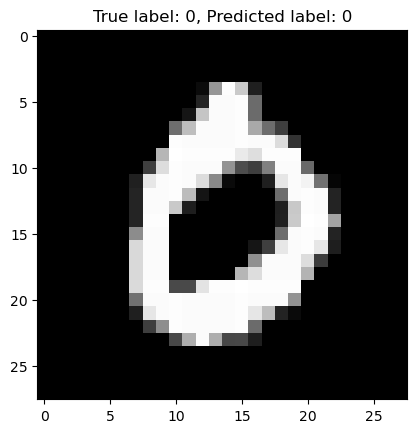

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


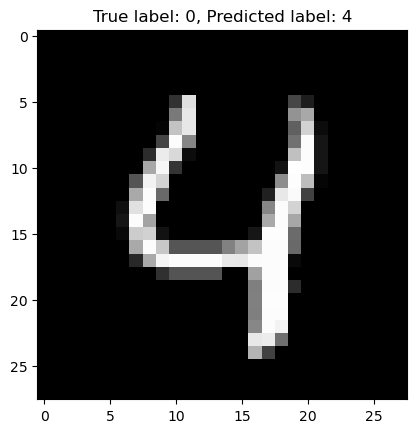

In [70]:
# Function to predict and show a single digit
def predict_and_show_digit(index):
    # Get the image and the true label
    image = test_images[index]
    true_label = np.argmax(test_labels[index])
    
    # Predict the label
    prediction = model.predict(np.expand_dims(image, axis=0))
    predicted_label = np.argmax(prediction[0])
    
    # Reshape the image back to (28, 28) for visualization
    image = tf.reshape(image, (28,28))
    # Show the imag
    plt.imshow(image, cmap='gray')
    plt.title(f"True label: {true_label}, Predicted label: {predicted_label}")
    plt.show()

# Test the model on a few individual examples
for i in range(5):  # Change the range for more examples
    predict_and_show_digit(i)
